# MyData Q1 Analysis (January - March 2018)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Show the matplotlib inline
%matplotlib inline

## Importing the data files

### Food Log

In [58]:
# Import the food log file
foodlog_df = pd.read_csv("https://mydataproject.blob.core.windows.net/csvfiles/FoodLog.csv", sep=",")
# print the head of the file
foodlog_df.head()

,Date,Calories In,Fat (g),Fiber (g),Carbs (g),Sodium (mg),Protein (g),Water (ml),WaterTargetAchieved,UnderEaten,Unnamed: 10
0,1/01/2018,1221,18,12,100,614,150,2250,Yes,Yes,NaN
1,2/01/2018,1156,48,10,128,847,48,2250,Yes,Yes,NaN
2,3/01/2018,1861,33,16,252,1604,82,1000,No,No,NaN
3,4/01/2018,1831,33,11,222,3423,61,1250,No,No,NaN
4,5/01/2018,1227,35,10,140,1348,71,3000,Yes,Yes,NaN


In [59]:
# Drop unnamed column
foodlog_df2 = foodlog_df.drop(['Unnamed: 10'], axis=1)
# print out head
foodlog_df2.head()

,Date,Calories In,Fat (g),Fiber (g),Carbs (g),Sodium (mg),Protein (g),Water (ml),WaterTargetAchieved,UnderEaten
0,1/01/2018,1221,18,12,100,614,150,2250,Yes,Yes
1,2/01/2018,1156,48,10,128,847,48,2250,Yes,Yes
2,3/01/2018,1861,33,16,252,1604,82,1000,No,No
3,4/01/2018,1831,33,11,222,3423,61,1250,No,No
4,5/01/2018,1227,35,10,140,1348,71,3000,Yes,Yes


In [60]:
def reset_index_on_int(file):
    file.index = np.arange(1, len(file) + 1)

In [61]:
# Set the index of the foodlog to 1
# foodlog_df2.index = np.arange(1, len(foodlog_df2) + 1)
reset_index_on_int(foodlog_df2)
# Print the head of the file
foodlog_df2.head()

,Date,Calories In,Fat (g),Fiber (g),Carbs (g),Sodium (mg),Protein (g),Water (ml),WaterTargetAchieved,UnderEaten
1,1/01/2018,1221,18,12,100,614,150,2250,Yes,Yes
2,2/01/2018,1156,48,10,128,847,48,2250,Yes,Yes
3,3/01/2018,1861,33,16,252,1604,82,1000,No,No
4,4/01/2018,1831,33,11,222,3423,61,1250,No,No
5,5/01/2018,1227,35,10,140,1348,71,3000,Yes,Yes


In [62]:
# Print out information about our foodlog file
foodlog_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1 to 118
Data columns (total 10 columns):
Date                   118 non-null object
Calories In            118 non-null int64
Fat (g)                118 non-null int64
Fiber (g)              118 non-null int64
Carbs (g)              118 non-null int64
Sodium (mg)            118 non-null int64
Protein (g)            118 non-null int64
Water (ml)             118 non-null int64
WaterTargetAchieved    118 non-null object
UnderEaten             118 non-null object
dtypes: int64(7), object(3)
memory usage: 10.1+ KB


In [63]:
foodlog_df2

,Date,Calories In,Fat (g),Fiber (g),Carbs (g),Sodium (mg),Protein (g),Water (ml),WaterTargetAchieved,UnderEaten
1,1/01/2018,1221,18,12,100,614,150,2250,Yes,Yes
2,2/01/2018,1156,48,10,128,847,48,2250,Yes,Yes
3,3/01/2018,1861,33,16,252,1604,82,1000,No,No
4,4/01/2018,1831,33,11,222,3423,61,1250,No,No
5,5/01/2018,1227,35,10,140,1348,71,3000,Yes,Yes
6,6/01/2018,1597,48,16,127,1933,167,2800,Yes,Yes
7,7/01/2018,1410,44,16,106,1081,146,2300,Yes,Yes
8,8/01/2018,1469,46,15,131,3790,137,2300,Yes,Yes
9,9/01/2018,1497,30,15,143,1385,159,2550,Yes,Yes
10,10/01/2018,1698,49,22,150,1803,159,2550,Yes,Yes


In [65]:
foodlog_df3 = foodlog_df2[:-29]
foodlog_df3.tail()

,Date,Calories In,Fat (g),Fiber (g),Carbs (g),Sodium (mg),Protein (g),Water (ml),WaterTargetAchieved,UnderEaten
85,27/03/2018,1565,59,9,110,1978,141,3500,Yes,Yes
86,28/03/2018,1979,63,26,176,2301,174,3725,Yes,No
87,29/03/2018,1410,34,20,138,2574,133,3000,Yes,Yes
88,30/03/2018,1246,35,4,119,1981,93,3500,Yes,Yes
89,31/03/2018,1488,31,24,154,1709,135,3250,Yes,Yes


### Total Exercise

In [13]:
# Import the total exercise file
totalexercise_df = pd.read_csv("https://mydataproject.blob.core.windows.net/csvfiles/TotalExercise.csv", sep=",")
# print the head of the file
totalexercise_df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Step Target Achieved,Calorie Target Achieved,Activity Target Achieved,Rest Day,Distance Achieved
0,1/09/2017,3721,13030,9.91,5,498,460,13,10,2266,Yes,Yes,No,Yes,Yes
1,2/09/2017,3015,8147,6.35,3,732,223,32,2,1245,Yes,No,No,No,Yes
2,3/09/2017,3837,13857,10.79,8,480,414,26,25,2379,Yes,Yes,No,No,Yes
3,4/09/2017,4274,12846,9.79,8,593,334,18,87,2757,Yes,Yes,Yes,No,Yes
4,5/09/2017,3519,11041,8.62,7,1044,380,10,6,1947,Yes,Yes,No,Yes,Yes


In [14]:
# Set the index of the totalexercise to 1
reset_index_on_int(totalexercise_df)
# Print the head of the file
totalexercise_df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Step Target Achieved,Calorie Target Achieved,Activity Target Achieved,Rest Day,Distance Achieved
1,1/09/2017,3721,13030,9.91,5,498,460,13,10,2266,Yes,Yes,No,Yes,Yes
2,2/09/2017,3015,8147,6.35,3,732,223,32,2,1245,Yes,No,No,No,Yes
3,3/09/2017,3837,13857,10.79,8,480,414,26,25,2379,Yes,Yes,No,No,Yes
4,4/09/2017,4274,12846,9.79,8,593,334,18,87,2757,Yes,Yes,Yes,No,Yes
5,5/09/2017,3519,11041,8.62,7,1044,380,10,6,1947,Yes,Yes,No,Yes,Yes


In [15]:
totalexercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 1 to 242
Data columns (total 15 columns):
Date                        242 non-null object
Calories Burned             242 non-null int64
Steps                       242 non-null int64
Distance                    242 non-null float64
Floors                      242 non-null int64
Minutes Sedentary           242 non-null object
Minutes Lightly Active      242 non-null int64
Minutes Fairly Active       242 non-null int64
Minutes Very Active         242 non-null int64
Activity Calories           242 non-null int64
Step Target Achieved        242 non-null object
Calorie Target Achieved     242 non-null object
Activity Target Achieved    242 non-null object
Rest Day                    242 non-null object
Distance Achieved           242 non-null object
dtypes: float64(1), int64(7), object(7)
memory usage: 30.2+ KB


In [16]:
# Convert columns to necessary datatypes
totalexercise_df['Date'] = pd.to_datetime(totalexercise_df['Date'],format='%d/%m/%Y', errors='ignore')
# print out columns to ensure that data was converted
totalexercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 1 to 242
Data columns (total 15 columns):
Date                        242 non-null datetime64[ns]
Calories Burned             242 non-null int64
Steps                       242 non-null int64
Distance                    242 non-null float64
Floors                      242 non-null int64
Minutes Sedentary           242 non-null object
Minutes Lightly Active      242 non-null int64
Minutes Fairly Active       242 non-null int64
Minutes Very Active         242 non-null int64
Activity Calories           242 non-null int64
Step Target Achieved        242 non-null object
Calorie Target Achieved     242 non-null object
Activity Target Achieved    242 non-null object
Rest Day                    242 non-null object
Distance Achieved           242 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(6)
memory usage: 30.2+ KB


In [17]:
totalexercise_df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Step Target Achieved,Calorie Target Achieved,Activity Target Achieved,Rest Day,Distance Achieved
1,2017-09-01,3721,13030,9.91,5,498,460,13,10,2266,Yes,Yes,No,Yes,Yes
2,2017-09-02,3015,8147,6.35,3,732,223,32,2,1245,Yes,No,No,No,Yes
3,2017-09-03,3837,13857,10.79,8,480,414,26,25,2379,Yes,Yes,No,No,Yes
4,2017-09-04,4274,12846,9.79,8,593,334,18,87,2757,Yes,Yes,Yes,No,Yes
5,2017-09-05,3519,11041,8.62,7,1044,380,10,6,1947,Yes,Yes,No,Yes,Yes


In [18]:
# Filter out dataset with date range
mask = (totalexercise_df['Date'] > '2017-12-31') & (totalexercise_df['Date'] < '2018-04-01')
# Apply mask to dataset and create new dataframe from it
totalexercise_df2 = totalexercise_df.loc[mask]
# reset index of totalexercise_df2
reset_index_on_int(totalexercise_df2)
# show head of total exercise_df2
totalexercise_df2.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Step Target Achieved,Calorie Target Achieved,Activity Target Achieved,Rest Day,Distance Achieved
1,2018-01-01,3006,6574,5.11,0,699,295,0,0,1265,No,No,No,Yes,Yes
2,2018-01-02,3262,8239,6.43,16,812,312,0,0,1485,Yes,No,No,Yes,Yes
3,2018-01-03,3372,6634,5.17,23,658,268,0,0,1403,No,No,No,Yes,Yes
4,2018-01-04,3765,15038,11.73,4,582,228,29,67,1943,Yes,Yes,Yes,No,Yes
5,2018-01-05,3195,7481,5.84,9,699,229,19,0,1212,No,No,No,Yes,Yes


In [19]:
# show tail of total_exercise_df2
totalexercise_df2.tail()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Step Target Achieved,Calorie Target Achieved,Activity Target Achieved,Rest Day,Distance Achieved
86,2018-03-27,3694,13497,10.53,23,672,298,37,33,1982,Yes,Yes,Yes,No,Yes
87,2018-03-28,3935,12884,9.68,10,638,336,12,68,2404,Yes,Yes,Yes,No,Yes
88,2018-03-29,3248,10560,8.24,10,710,344,4,5,1620,Yes,No,No,Yes,Yes
89,2018-03-30,3269,9181,6.95,18,737,318,7,2,1604,Yes,No,No,Yes,Yes
90,2018-03-31,2934,7461,6.00,11,691,302,0,0,1274,No,No,No,Yes,Yes


#### Data Exploration

C:\Users\Will\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


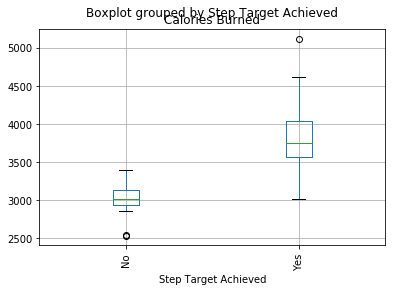

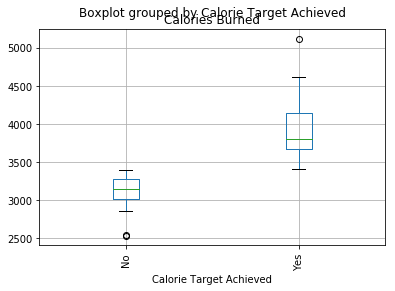

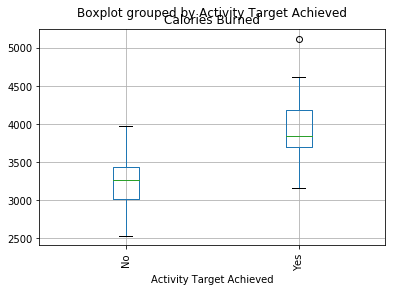

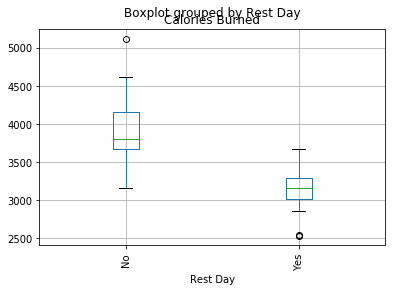

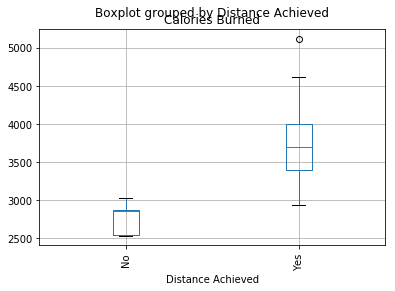

In [20]:
# Create a box plots for calories burned against various categorical data
totalexercise_df2.boxplot(column='Calories Burned', by='Step Target Achieved', rot=90)
totalexercise_df2.boxplot(column='Calories Burned', by='Calorie Target Achieved', rot=90)
totalexercise_df2.boxplot(column='Calories Burned', by='Activity Target Achieved', rot=90)
totalexercise_df2.boxplot(column='Calories Burned', by='Rest Day', rot=90)
totalexercise_df2.boxplot(column='Calories Burned', by='Distance Achieved', rot=90)

# show plots
plt.show()

In [21]:
# Creating variables for dataset columns
calories_burned = totalexercise_df2['Calories Burned']
activity_calories = totalexercise_df2['Activity Calories']
steps = totalexercise_df2['Steps']
floors = totalexercise_df2['Floors']
distance = totalexercise_df2['Distance']
minutes_sedentary = totalexercise_df2['Minutes Sedentary']
minutes_light_active = totalexercise_df2['Minutes Lightly Active']
minutes_fairly_active = totalexercise_df2['Minutes Fairly Active']
minutes_very_active = totalexercise_df2['Minutes Very Active']

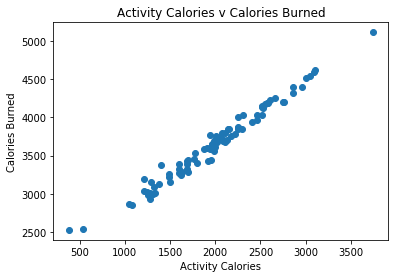

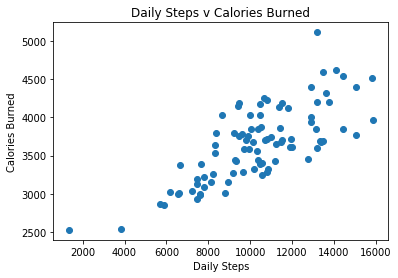

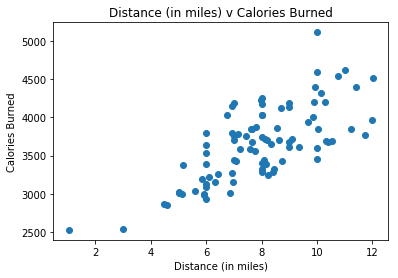

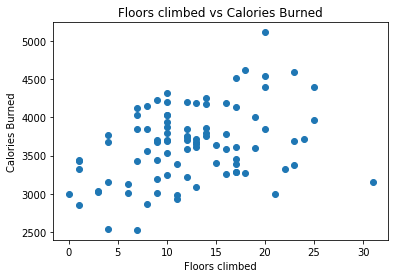

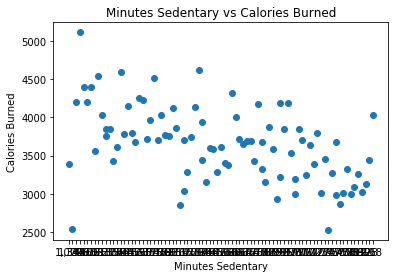

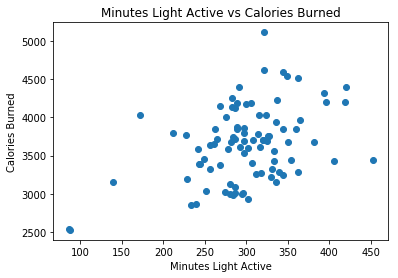

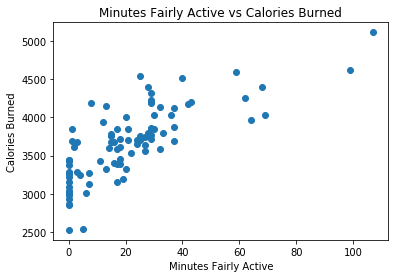

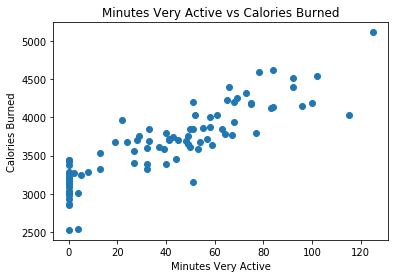

In [22]:
# Create scatter plots for calories burned against Activity calories
plt.scatter(activity_calories, calories_burned)
plt.xlabel('Activity Calories')
plt.ylabel('Calories Burned')
plt.title('Activity Calories v Calories Burned')
plt.show()

# Create scatter plot for calories burned vs steps
plt.scatter(steps,calories_burned)
plt.xlabel('Daily Steps')
plt.ylabel('Calories Burned')
plt.title('Daily Steps v Calories Burned')
plt.show()

# Create scatter plot for calories burned vs distance
plt.scatter(distance, calories_burned)
plt.xlabel('Distance (in miles)')
plt.ylabel('Calories Burned')
plt.title('Distance (in miles) v Calories Burned')
plt.show()

# Create scatter plot for calories burned vs floors
plt.scatter(floors, calories_burned)
plt.xlabel('Floors climbed')
plt.ylabel('Calories Burned')
plt.title('Floors climbed vs Calories Burned')
plt.show()

# Create scatter plot for minutes vs calories burned
plt.scatter(minutes_sedentary, calories_burned)
plt.xlabel('Minutes Sedentary')
plt.ylabel('Calories Burned')
plt.title('Minutes Sedentary vs Calories Burned')
plt.show()

plt.scatter(minutes_light_active, calories_burned)
plt.xlabel('Minutes Light Active')
plt.ylabel('Calories Burned')
plt.title('Minutes Light Active vs Calories Burned')
plt.show()

plt.scatter(minutes_fairly_active, calories_burned)
plt.xlabel('Minutes Fairly Active')
plt.ylabel('Calories Burned')
plt.title('Minutes Fairly Active vs Calories Burned')
plt.show()

plt.scatter(minutes_very_active, calories_burned)
plt.xlabel('Minutes Very Active')
plt.ylabel('Calories Burned')
plt.title('Minutes Very Active vs Calories Burned')
plt.show()

### Total Sleep

In [23]:
# Import the total sleep file
totalsleep_df = pd.read_csv("https://mydataproject.blob.core.windows.net/csvfiles/TotalSleep.csv", sep=",")
# print the head of the file
totalsleep_df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Sleep Target Achieved,% Asleep,% Awake,% Light sleep,% REM Sleep,% Deep Sleep,% Unclassified
0,31/08/2017,1/09/2017,320,45,30,365,47.0,200.0,73.0,No,87.67,12.33,54.79,12.88,20.00,12.33
1,1/09/2017,2/09/2017,402,49,35,451,79.0,237.0,86.0,No,89.14,10.86,52.55,17.52,19.07,10.86
2,2/09/2017,3/09/2017,456,39,34,495,118.0,228.0,110.0,Yes,92.12,7.88,46.06,23.84,22.22,7.88
3,3/09/2017,4/09/2017,362,46,30,408,63.0,188.0,111.0,No,88.73,11.27,46.08,15.44,27.21,11.27
4,5/09/2017,6/09/2017,370,47,29,417,15.0,271.0,84.0,No,88.73,11.27,64.99,3.60,20.14,11.27


In [24]:
# Set the index of the totalsleep to 1
reset_index_on_int(totalsleep_df)
# Print the head of the file
totalsleep_df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Sleep Target Achieved,% Asleep,% Awake,% Light sleep,% REM Sleep,% Deep Sleep,% Unclassified
1,31/08/2017,1/09/2017,320,45,30,365,47.0,200.0,73.0,No,87.67,12.33,54.79,12.88,20.00,12.33
2,1/09/2017,2/09/2017,402,49,35,451,79.0,237.0,86.0,No,89.14,10.86,52.55,17.52,19.07,10.86
3,2/09/2017,3/09/2017,456,39,34,495,118.0,228.0,110.0,Yes,92.12,7.88,46.06,23.84,22.22,7.88
4,3/09/2017,4/09/2017,362,46,30,408,63.0,188.0,111.0,No,88.73,11.27,46.08,15.44,27.21,11.27
5,5/09/2017,6/09/2017,370,47,29,417,15.0,271.0,84.0,No,88.73,11.27,64.99,3.60,20.14,11.27


In [25]:
totalsleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 210
Data columns (total 16 columns):
Start Time               210 non-null object
End Time                 210 non-null object
Minutes Asleep           210 non-null int64
Minutes Awake            210 non-null int64
Number of Awakenings     210 non-null int64
Time in Bed              210 non-null int64
Minutes REM Sleep        209 non-null float64
Minutes Light Sleep      209 non-null float64
Minutes Deep Sleep       209 non-null float64
Sleep Target Achieved    210 non-null object
% Asleep                 210 non-null float64
% Awake                  210 non-null float64
% Light sleep            210 non-null object
% REM Sleep              210 non-null object
% Deep Sleep             210 non-null object
% Unclassified           210 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 27.9+ KB


In [39]:
# Convert columns to necessary datatypes
totalsleep_df['Start Time'] = pd.to_datetime(totalsleep_df['Start Time'],format='%d/%m/%Y', errors='ignore')
totalsleep_df['End Time'] = pd.to_datetime(totalsleep_df['End Time'],format='%d/%m/%Y', errors='ignore')
# print out columns to ensure that data was converted
totalsleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 210
Data columns (total 16 columns):
Start Time               210 non-null datetime64[ns]
End Time                 210 non-null datetime64[ns]
Minutes Asleep           210 non-null int64
Minutes Awake            210 non-null int64
Number of Awakenings     210 non-null int64
Time in Bed              210 non-null int64
Minutes REM Sleep        209 non-null float64
Minutes Light Sleep      209 non-null float64
Minutes Deep Sleep       209 non-null float64
Sleep Target Achieved    210 non-null object
% Asleep                 210 non-null float64
% Awake                  210 non-null float64
% Light sleep            210 non-null object
% REM Sleep              210 non-null object
% Deep Sleep             210 non-null object
% Unclassified           210 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 27.9+ KB


In [40]:
totalsleep_df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Sleep Target Achieved,% Asleep,% Awake,% Light sleep,% REM Sleep,% Deep Sleep,% Unclassified
1,2017-08-31,2017-01-09,320,45,30,365,47.0,200.0,73.0,No,87.67,12.33,54.79,12.88,20.00,12.33
2,2017-01-09,2017-02-09,402,49,35,451,79.0,237.0,86.0,No,89.14,10.86,52.55,17.52,19.07,10.86
3,2017-02-09,2017-03-09,456,39,34,495,118.0,228.0,110.0,Yes,92.12,7.88,46.06,23.84,22.22,7.88
4,2017-03-09,2017-04-09,362,46,30,408,63.0,188.0,111.0,No,88.73,11.27,46.08,15.44,27.21,11.27
5,2017-05-09,2017-06-09,370,47,29,417,15.0,271.0,84.0,No,88.73,11.27,64.99,3.60,20.14,11.27


### Weight Measurements

In [28]:
# Import the weight measurements file
weightmeasurements_df = pd.read_csv("https://mydataproject.blob.core.windows.net/csvfiles/WeightMeasurements.csv", sep=",")
# print the head of the file
weightmeasurements_df.head()

,WeightID,Date,Weight (Stone),Weight (Kg),Weight (lbs),Gain/Loss Amount (lbs),BMI,BodyFat (%)
0,1,25/12/2017,16.80,105.0,231.0,0.0,29.71,NaN
1,2,1/01/2018,16.70,104.7,230.0,-1.0,29.62,NaN
2,3,8/01/2018,16.20,102.5,225.9,-4.1,29.00,NaN
3,4,15/01/2018,15.13,101.1,222.8,-3.1,28.60,NaN
4,5,22/01/2018,15.11,100.2,220.9,-1.9,28.35,NaN


In [29]:
# Set the index of the weight measurements to weightID column
weightmeasurements_df.set_index('WeightID', inplace=True)
# Print the head of the file
weightmeasurements_df.head()

,Date,Weight (Stone),Weight (Kg),Weight (lbs),Gain/Loss Amount (lbs),BMI,BodyFat (%)
WeightID,,,,,,,
1,25/12/2017,16.80,105.0,231.0,0.0,29.71,NaN
2,1/01/2018,16.70,104.7,230.0,-1.0,29.62,NaN
3,8/01/2018,16.20,102.5,225.9,-4.1,29.00,NaN
4,15/01/2018,15.13,101.1,222.8,-3.1,28.60,NaN
5,22/01/2018,15.11,100.2,220.9,-1.9,28.35,NaN


In [30]:
weightmeasurements_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1 to 18
Data columns (total 7 columns):
Date                      18 non-null object
Weight (Stone)            18 non-null float64
Weight (Kg)               18 non-null float64
Weight (lbs)              18 non-null float64
Gain/Loss Amount (lbs)    18 non-null float64
BMI                       18 non-null float64
BodyFat (%)               10 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.1+ KB


In [31]:
# Convert columns to necessary datatypes
weightmeasurements_df['Date'] = pd.to_datetime(weightmeasurements_df['Date'], format='%d/%m/%Y', errors='ignore')
# print out columns to ensure that data was converted
weightmeasurements_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1 to 18
Data columns (total 7 columns):
Date                      18 non-null datetime64[ns]
Weight (Stone)            18 non-null float64
Weight (Kg)               18 non-null float64
Weight (lbs)              18 non-null float64
Gain/Loss Amount (lbs)    18 non-null float64
BMI                       18 non-null float64
BodyFat (%)               10 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.1 KB


In [32]:
weightmeasurements_df

,Date,Weight (Stone),Weight (Kg),Weight (lbs),Gain/Loss Amount (lbs),BMI,BodyFat (%)
WeightID,,,,,,,
1,2017-12-25,16.80,105.0,231.0,0.0,29.71,NaN
2,2018-01-01,16.70,104.7,230.0,-1.0,29.62,NaN
3,2018-01-08,16.20,102.5,225.9,-4.1,29.00,NaN
4,2018-01-15,15.13,101.1,222.8,-3.1,28.60,NaN
5,2018-01-22,15.11,100.2,220.9,-1.9,28.35,NaN
6,2018-01-28,15.11,100.2,220.9,0.0,28.35,NaN
7,2018-02-08,15.08,99.0,218.0,-2.9,28.01,NaN
8,2018-02-17,15.06,97.9,215.8,-2.2,27.70,NaN
9,2018-02-26,14.13,94.8,209.0,-6.8,26.82,18.6


In [33]:
# Filter out dataset with date range
mask = (weightmeasurements_df['Date'] > '2017-12-31') & (weightmeasurements_df['Date'] < '2018-03-31')
# Apply mask to dataset and create new dataframe from it
weightmeasurements_df2 = weightmeasurements_df.loc[mask]
# reset index of totalexercise_df2
reset_index_on_int(weightmeasurements_df2)
# show head of total exercise_df2
weightmeasurements_df2

,Date,Weight (Stone),Weight (Kg),Weight (lbs),Gain/Loss Amount (lbs),BMI,BodyFat (%)
1,2018-01-01,16.70,104.7,230.0,-1.0,29.62,NaN
2,2018-01-08,16.20,102.5,225.9,-4.1,29.00,NaN
3,2018-01-15,15.13,101.1,222.8,-3.1,28.60,NaN
4,2018-01-22,15.11,100.2,220.9,-1.9,28.35,NaN
5,2018-01-28,15.11,100.2,220.9,0.0,28.35,NaN
6,2018-02-08,15.08,99.0,218.0,-2.9,28.01,NaN
7,2018-02-17,15.06,97.9,215.8,-2.2,27.70,NaN
8,2018-02-26,14.13,94.8,209.0,-6.8,26.82,18.6
9,2018-03-04,15.04,95.4,210.3,1.3,26.99,20.8
10,2018-03-11,14.12,94.3,208.0,-2.3,26.68,20.8


#### Data Exploration

In [34]:
date = weightmeasurements_df2['Date']
weight_stone = weightmeasurements_df2['Weight (Stone)']
weight_kg = weightmeasurements_df2['Weight (Kg)']
weight_lbs = weightmeasurements_df2['Weight (lbs)']
gain_loss_amount = weightmeasurements_df2['Gain/Loss Amount (lbs)']
bmi = weightmeasurements_df2['BMI']
body_fat = weightmeasurements_df2['BodyFat (%)']

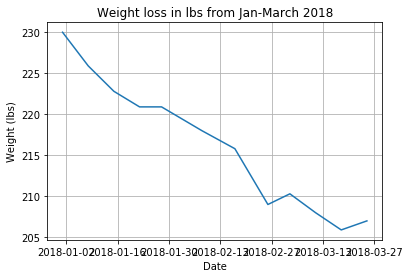

In [35]:
# Plot weight in lbs over time
fig, ax = plt.subplots()
ax.plot(date, weight_lbs)

# Set the labels
ax.set(xlabel='Date', ylabel='Weight (lbs)', title='Weight loss in lbs from Jan-March 2018')
ax.grid()

# Show the plot
plt.show()